<a href="https://colab.research.google.com/github/Jonyeock/extract-text-from-image/blob/master/data/dataprocess/MorphGradient.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt

In [1]:
cd drive/My\ Drive/googleimage

/content/drive/My Drive/googleimage


In [0]:
def morph():
  img = cv2.imread('tit.jpg', cv2.IMREAD_GRAYSCALE)
  
  kernel = np.ones((2, 2), np.uint8)
  
  erosion = cv2.erode(img, kernel, iterations=1)
  dilation = cv2.dilate(img, kernel, iterations=1)
  
  plt.figure(figsize=(50, 20))
  
  plt.subplot(411)
  plt.imshow(img)
  plt.title('original') 
  plt.subplot(412)
  
  plt.imshow(erosion, cmap='gray')
  plt.title('erosion')
  
  plt.subplot(413)
  plt.imshow(dilation, cmap='gray')
  plt.title('dilation')
  
  morphology = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)
  plt.subplot(414)
  plt.imshow(morphology, cmap='gray')
  plt.title('morphgradient')

erosion, dilation, MorphGradient 참고

https://m.blog.naver.com/samsjang/220505815055

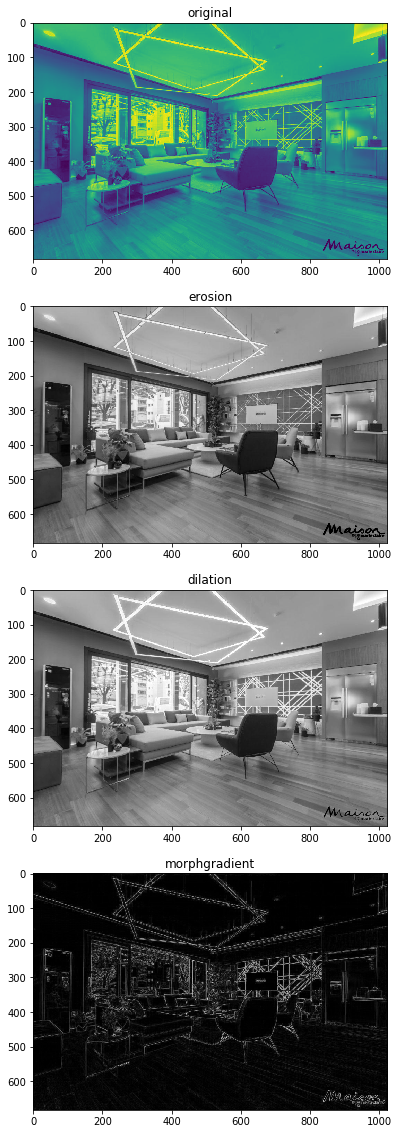

In [72]:
morph()

<function matplotlib.pyplot.show>

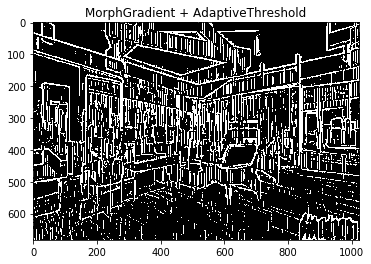

In [93]:
img = cv2.imread('tit.jpg')
img2 =  cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
kernel = np.ones((50,1), np.uint8)

morphology = cv2.morphologyEx(img2, cv2.MORPH_GRADIENT, kernel)

th1 = cv2.adaptiveThreshold(morphology, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 5)
plt.imshow(th1, 'gray')
plt.title('MorphGradient + AdaptiveThreshold')
plt.show

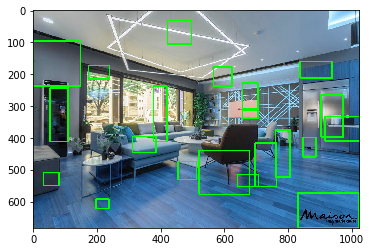

In [94]:
image, contours, hierarchy = cv2.findContours(th1, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# print(contours[2].size)
# print(len(contours))
for cnt in range(len(contours)):
  x, y, w, h = cv2.boundingRect(contours[cnt])
  if 200 > w > 40 and 200 > h > 20:
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 3)

    rect = cv2.minAreaRect(contours[cnt])
    box = cv2.boxPoints(rect)
    box = np.int0(box)
#     img = cv2.drawContours(img, [box], 0, (0, 255, 0), 3)
    plt.imshow(img, 'gray')
    plt.show